# Распределение $\chi^2_k$

Ссылка на wiki:

 https://ru.wikipedia.org/wiki/Распределение_хи-квадрат

Импорт библиотек numpy, scipy, matplotlib.

In [60]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

Генерация выборки из распределения $\chi^2_k$ объема 1000 ($ k = 6 $)

In [297]:
k = 6
chi2 = sts.chi2(k)
sample = chi2.rvs(1000)
x = np.linspace(0, 20, 100)
pdf_chi2 = chi2.pdf(x)

Гистограма выборки и плотность рапределения 

Text(0.5, 0, 'x')

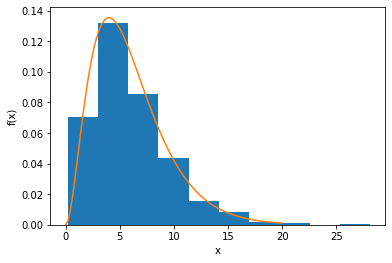

In [298]:
plt.hist(sample, density=True)
plt.plot(x, pdf_chi2)

plt.ylabel("f(x)")
plt.xlabel("x")

Функция для 1000 выборок объема $ n $ 

In [285]:
def ex (n):
    ex = []
    for i in range(1000):
        sum = 0
        sample = chi2.rvs(n)
        for j in range(n):
            sum += sample[j]
        ex.append(sum/n)
    return ex

Математическое ожидание распределения $\chi^2_k$ равняется $ k $ $(EX = k) $

Дисперсия распеределения $\chi^2_k$ равняется $(2 * k)$, по ЦПТ получается $(2 * k) \over n$, но так как $\sigma^2 = {(2 * k) \over n} $, то для функции нормального распределения следует извлечь корень. Получается:
$\sqrt{(2 * k) \over n} $

Зададим эти переменные сразу внутри функции, которая вычисляет плотность функции нормального распределения


In [314]:
x_norm = np.linspace(2,10,100)
def norm(n):
    ex_norm = k
    dx_norm = np.sqrt(2*k/n) 
    norm_rv = sts.norm(ex_norm, dx_norm)
    pdf = norm_rv.pdf(x_norm)
    return pdf

Построим диаграмы по 1000 выборок от $n=5, n=10, n=50$ и вычислим значения функций нормального распределния от мат. ожидания и корня из дисперсии деленной на $n$

Text(0.5, 0, 'x')

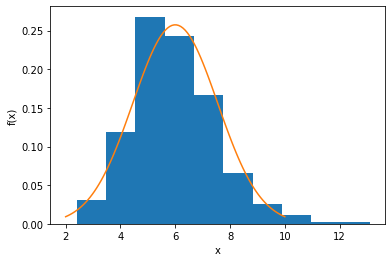

In [315]:
plt.hist(ex(5), density=True)
plt.plot(x_norm, norm(5))

plt.ylabel("f(x)")
plt.xlabel("x")

Text(0.5, 0, 'x')

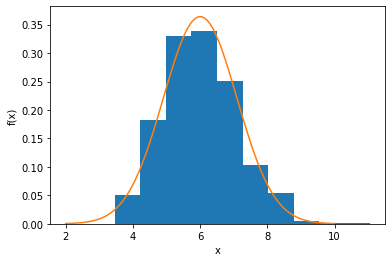

In [316]:
plt.hist(ex(10), density=True)
plt.plot(x_norm, norm(10))

plt.ylabel("f(x)")
plt.xlabel("x")

Text(0.5, 0, 'x')

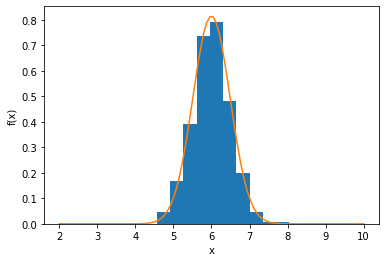

In [317]:
plt.hist(ex(50), density=True)
plt.plot(x_norm, norm(50))

plt.ylabel("f(x)")
plt.xlabel("x")

### Из данных полученных в ходе данной работы можно сделать вывод, что с ростом числа $n$ точность апроксимации увеличивается